In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helper import fit_and_plot_linear, fit_and_plot_multi
%matplotlib inline

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df_results = pd.DataFrame(columns=['Predictor', 'R2 Train', 'R2 Test'])

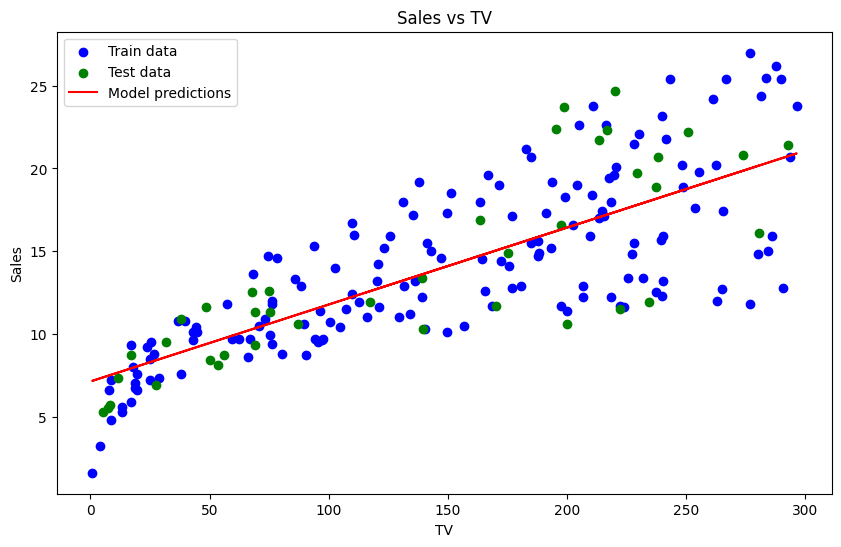

AttributeError: 'DataFrame' object has no attribute 'append'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_results = pd.DataFrame(columns=['Model', 'Train R^2', 'Test R^2'])
def fit_and_plot_linear(predictor):
    X = df[[predictor]]
    y = df['Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train,y_train_pred)
    test_r2= r2_score(y_test, y_test_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color = 'blue', label='Train data')
    plt.scatter(X_test, y_test, color ='green', label='Test data')
    plt.plot(X_train, y_train_pred, color ='red', label='Model predictions')
    plt.xlabel(predictor)
    plt.ylabel('Sales')
    plt.title(f'Sales vs {predictor}')
    plt.legend()
    plt.show()

    return train_r2, test_r2

def fit_and_plot_multi():
    X = df[['TV', 'Radio', 'Newspaper']]
    y = df['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred= model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2= r2_score(y_test,y_test_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_train)), y_train, color='blue', label='Train data')
    plt.scatter(range(len(y_test)), y_test,color = 'green', label ='Test data')
    plt.plot(range(len(y_train)), y_train_pred, color='red', label = 'Model prediction (Train)')
    plt.plot(range(len(y_test)), y_test_pred, color='orange', label='Model prediction (Test)')
    plt.xlabel('Index')
    plt.ylabel('Sales')
    plt.title('Sales vs All Predictors')
    plt.legend()
    plt.show()

    return train_r2, test_r2

for predictor in ['TV','Radio', 'Newspaper']:
    train_r2, test_r2 = fit_and_plot_linear(predictor)
    df_results = df_results.append({'Model':f'{predictor} only', 'Train R^2':train_r2,'Test R^2': test_r2}, ignore_index=True)

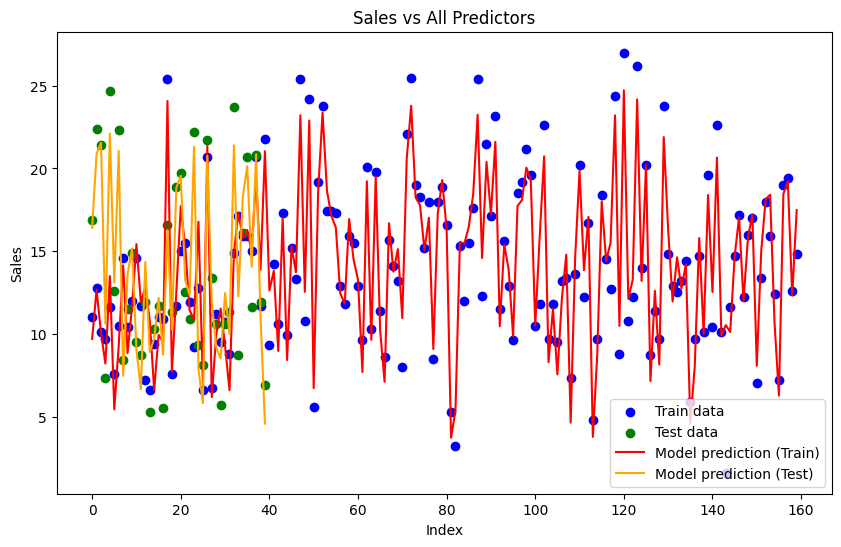

AttributeError: 'DataFrame' object has no attribute 'append'

In [6]:
train_r2, test_r2 = fit_and_plot_multi()
df_results = df_results.append({'model':'All predictors', 'Train R^2':train_r2,'Test R^2':test_r2}, ignore_index=True)

In [7]:
df_results.head()

,Model,Train R^2,Test R^2
